In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [46]:
# set default font size
plt.rcParams.update({'font.size': 16})


In [14]:
from config import settings
from pathlib import Path
settings_type = 'SETTINGS1'
data_path = Path(settings.data['path']['raw'])
pop_params_path = Path(settings.simulation[settings_type]['population_param'])
anomaly_loc = settings.simulation[settings_type]['anomaly_loc']


In [15]:
from psm.simulation.population import Population
pop = Population()
pop.load_population(pop_params_path)

In [17]:
from psm.simulation.population_manipulator import PopulationManipulator
pop_manip = PopulationManipulator(pop)

In [48]:
from psm.simulation.mdof_system import MdofSystem
from tqdm import tqdm
lat_list = np.linspace(5, 100, 200)
transfert_function_l = []
for lat in tqdm(lat_list):
    manipulation = [{'type':'environment','latent_value':lat,'coefficients':'load'}]
    affected_pop = pop_manip.affect(manipulation)
    sys0=MdofSystem(M=affected_pop.systems_matrices['system_0']['M'],
            K=affected_pop.systems_matrices['system_0']['K'],
            C=affected_pop.systems_matrices['system_0']['C'])
    freq_axis = np.linspace(1, 150, 1000)
    omega = 2*np.pi*freq_axis
    tsf = sys0.transfer_function(omega=omega,i=0,j=7)
    transfert_function_l.append(tsf)

100%|██████████| 200/200 [02:22<00:00,  1.41it/s]


/tmp/ipykernel_132011/114082276.py:22: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(scm)


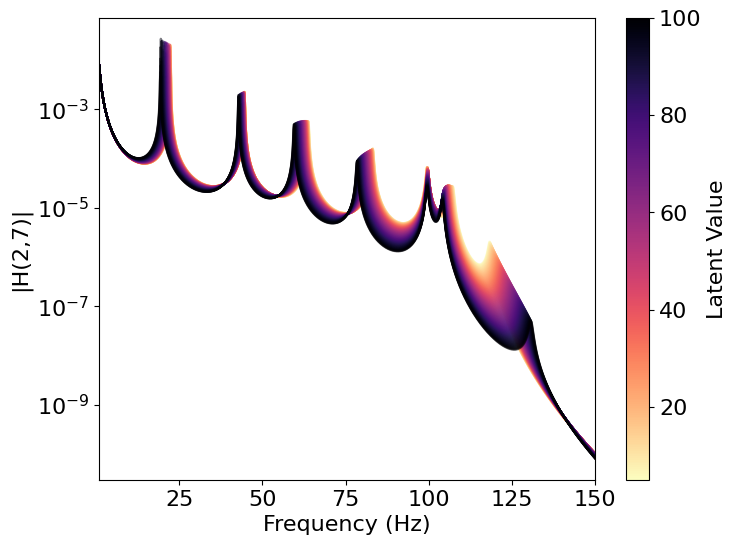

In [55]:
import seaborn as sns
transfert_function = np.array(transfert_function_l)
magnitude = np.abs(transfert_function)

# Set up the color palette for the different latent values
color = sns.color_palette('magma_r', len(lat_list))

fig, ax = plt.subplots(figsize=(8, 6))

# Plot each transfer function
for i, lat in enumerate(lat_list):
    ax.plot(freq_axis, magnitude[i], color=color[i], alpha=0.5)
ax.set_yscale('log')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('|H(2,7)|')

# Create a scalar mappable for the colormap
scm = plt.cm.ScalarMappable(cmap='magma_r')
scm.set_array(lat_list)

# Add a color bar to the plot
cbar = plt.colorbar(scm)

# Set the label for the color bar
cbar.set_label('Latent Value')
plt.margins(x=0)
plt.savefig('fig/envirement_effect.png', dpi=300, bbox_inches='tight')

plt.show()

In [50]:
from psm.simulation.mdof_system import MdofSystem
from tqdm import tqdm
a_list = np.linspace(0, 0.15, 50)
transfert_function_a = []
for a in tqdm(a_list):
    manipulation = [{'type':'anomaly', 'location': anomaly_loc,\
                                  'anomaly_type': 'stiffness', 'anomaly_size': a}]
    affected_pop = pop_manip.affect(manipulation)
    sys0=MdofSystem(M=affected_pop.systems_matrices['system_0']['M'],
            K=affected_pop.systems_matrices['system_0']['K'],
            C=affected_pop.systems_matrices['system_0']['C'])
    freq_axis = np.linspace(1, 150, 1000)
    omega = 2*np.pi*freq_axis
    tsf = sys0.transfer_function(omega=omega,i=0,j=7)
    transfert_function_a.append(tsf)

100%|██████████| 50/50 [00:46<00:00,  1.08it/s]


/tmp/ipykernel_132011/4170151488.py:22: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(scm)


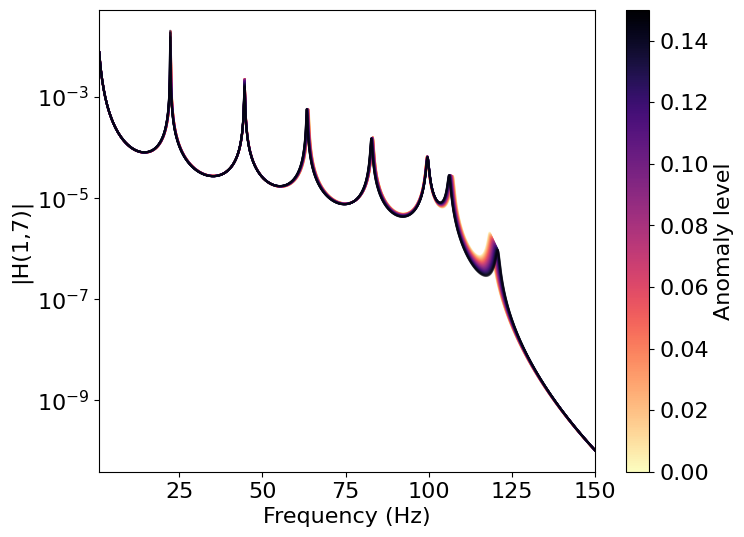

In [54]:
import seaborn as sns
transfert_function_a = np.array(transfert_function)
magnitude = np.abs(transfert_function_a)

# Set up the color palette for the different latent values
color = sns.color_palette('magma_r', len(a_list))

fig, ax = plt.subplots(figsize=(8, 6))

# Plot each transfer function
for i, lat in enumerate(a_list):
    ax.plot(freq_axis, magnitude[i], color=color[i], alpha=0.5)
ax.set_yscale('log')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('|H(1,7)|')

# Create a scalar mappable for the colormap
scm = plt.cm.ScalarMappable(cmap='magma_r')
scm.set_array(a_list)

# Add a color bar to the plot
cbar = plt.colorbar(scm)

# Set the label for the color bar
cbar.set_label('Anomaly level')
plt.margins(x=0)
# save the figure
plt.savefig('fig/anomaly_effect.png', dpi=300, bbox_inches='tight')
plt.show()
